In [7]:
%pylab inline
import pandas
import sqlite3
import pymc3
import seaborn as sns
from sklearn import *
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


In [8]:
con = sqlite3.connect('/tmp/data.sqlite3')

In [9]:
data = pandas.read_sql('SELECT * FROM data where adjusted_demand is not null and rand = 1', con=con)

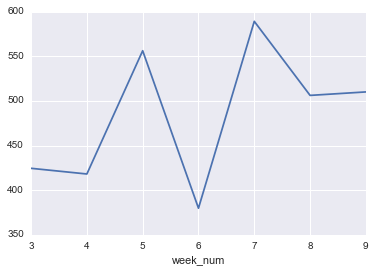

In [17]:
data.groupby('week_num').adjusted_demand.agg({'avg_val': np.mean, 'variance': np.var}).variance.plot()

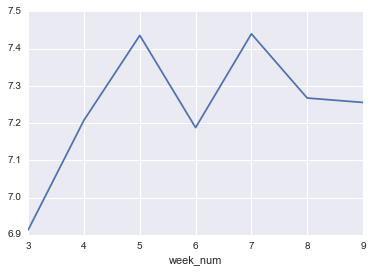

In [18]:
data.groupby('week_num').adjusted_demand.agg({'avg_val': np.mean, 'variance': np.var}).avg_val.plot()

# Conclusion

This suggests there may not be much variation week to week.